500581 hubggene and model processing

In [40]:
import pandas as pd

expression_df = pd.read_csv("GSE50058.csv", index_col=0)

In [2]:
expression_df

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Rejection Status
GSM1213289,4.412003,3.365282,4.142343,7.442147,2.312794,3.943882,3.496575,2.732255,3.655529,2.312794,...,11.110997,11.262259,11.457425,12.278762,12.130433,14.359985,14.571807,16.069533,15.626030,Non Rejection
GSM1213290,8.418660,5.206153,2.528980,8.027655,2.312794,4.064825,2.591164,3.008397,2.894678,2.436985,...,10.914057,10.830813,10.979552,12.020552,11.842536,14.610206,14.531008,16.057891,15.912677,Non Rejection
GSM1213291,7.743590,4.207186,2.769058,7.984528,2.312794,3.447934,2.666751,2.316967,3.052854,2.312794,...,10.513403,10.394816,10.527530,11.659199,11.404545,14.504649,14.353342,15.894131,15.753970,Non Rejection
GSM1213292,7.646299,3.196709,2.502377,8.073020,2.312794,4.569509,3.129843,2.316967,2.667046,2.312794,...,11.062947,11.071267,11.196127,12.251241,11.981929,14.637438,14.591767,16.117213,15.970946,Non Rejection
GSM1213293,7.515312,4.039253,2.365626,7.974305,2.312794,2.992617,2.713734,2.316967,2.370153,2.312794,...,9.867020,10.056278,10.010487,11.183005,10.924625,13.872618,13.903985,15.841868,15.756689,Non Rejection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1213385,7.871337,4.277099,3.234229,8.046433,2.312794,4.770682,3.382907,2.316967,4.892950,2.312794,...,10.607333,10.285704,10.558399,11.741420,11.452669,14.708704,14.751835,15.838156,15.746098,Rejection
GSM1213386,6.586944,4.396694,5.908935,6.847206,2.312794,5.534966,2.811004,2.886316,8.072180,2.312794,...,10.431571,10.337717,10.534009,11.666105,11.373857,14.319028,14.304099,15.524180,15.495600,Non Rejection
GSM1213387,8.113412,4.966291,3.426933,8.654701,2.312794,4.373348,3.075388,2.408701,3.145226,2.347056,...,9.572653,9.436200,9.611220,10.922656,10.676562,14.397957,14.377970,15.371247,15.339601,Non Rejection
GSM1213388,4.556135,4.538842,2.930683,4.673147,2.325085,4.178747,2.721374,2.316967,6.582622,2.312794,...,12.380857,12.193685,12.329166,13.013381,12.895168,14.815939,14.844221,15.831441,15.778055,Non Rejection


Model

21374's interval Hubgene

In [3]:
hub_genes = ["CXCL9", "MIR155 /// MIR155HG", "CD8A", "CLIC2", "GBP5.1", "235229_at", "RP1-93H18.6"]

In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
                  Gene  Coefficient
5            235229_at     0.977166
1  MIR155 /// MIR155HG     0.577272
4               GBP5.1    -0.482183
2                 CD8A    -0.464337
6          RP1-93H18.6     0.146550
3                CLIC2    -0.073725
0                CXCL9     0.051721


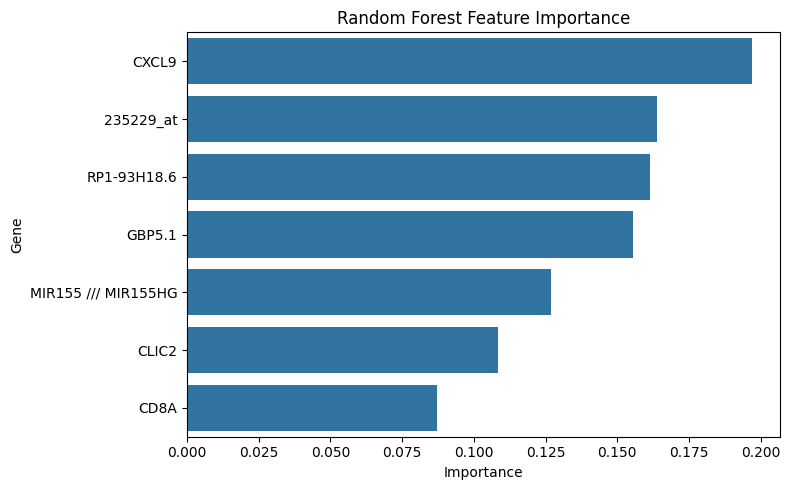


AUC - Logistic: 0.915
AUC - Random Forest: 0.842


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.876


21374's cyto node hubgene

In [8]:
hub_genes = ["CXCL9", "GZMA", "CD8A", "IDO1", "CD69"]

In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
    Gene  Coefficient
0  CXCL9     0.316253
4   CD69     0.190098
2   CD8A    -0.153554
3   IDO1     0.109045
1   GZMA     0.101255


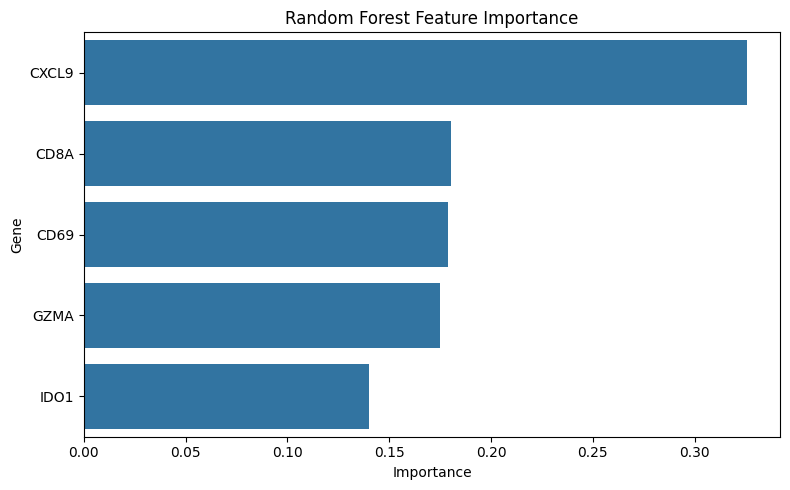


AUC - Logistic: 0.859
AUC - Random Forest: 0.776


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.842


36059's interval hub gene

In [13]:
hub_genes = ["CCL4", "PLA1A", "FAM26F.1", "CXCL11", "RBP7", "IDO1"]

Logistic Regression Coefficients:
       Gene  Coefficient
0      CCL4     0.626664
4      RBP7    -0.542018
2  FAM26F.1     0.414798
3    CXCL11     0.141032
5      IDO1    -0.120222
1     PLA1A     0.047041


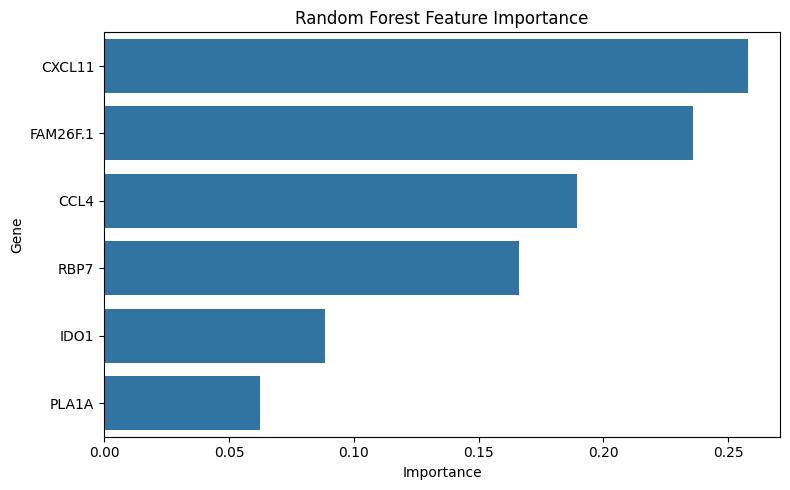


AUC - Logistic: 0.957
AUC - Random Forest: 0.944


In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.970


36059's cyto node hubgene

In [17]:
hub_genes = ["CXCL10", "IDO1", "LILRB2", "CXCL9", "CCL4"]

Logistic Regression Coefficients:
     Gene  Coefficient
4    CCL4     0.904658
2  LILRB2    -0.726094
0  CXCL10     0.240747
1    IDO1    -0.201250
3   CXCL9     0.161786


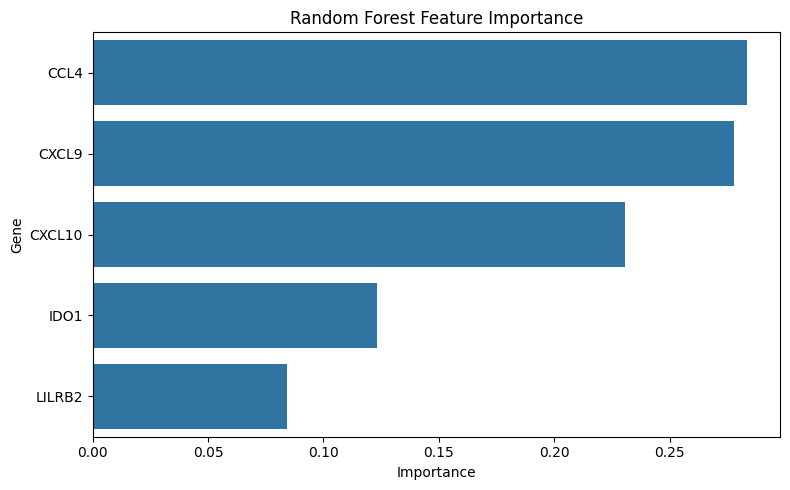


AUC - Logistic: 0.932
AUC - Random Forest: 0.919


In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]


stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.949


48581's interval hub gene

In [33]:
hub_genes = ["SCMH1", "WDR3", "LOC100507073"]

Logistic Regression Coefficients:
           Gene  Coefficient
0         SCMH1    -0.530733
2  LOC100507073    -0.140576
1          WDR3     0.076345


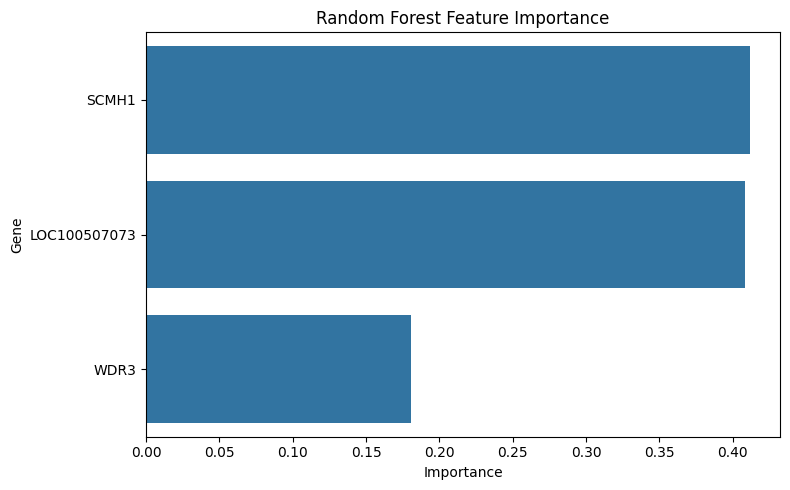


AUC - Logistic: 0.491
AUC - Random Forest: 0.637


In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]


stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.603


48581's cyto node hub gene

In [37]:
hub_genes = ["CXCL13", "LILRB2", "CD8A", "FOS", "RGS1"]

Logistic Regression Coefficients:
     Gene  Coefficient
0  CXCL13     0.390930
4    RGS1     0.167387
1  LILRB2    -0.114255
2    CD8A     0.060134
3     FOS    -0.001346


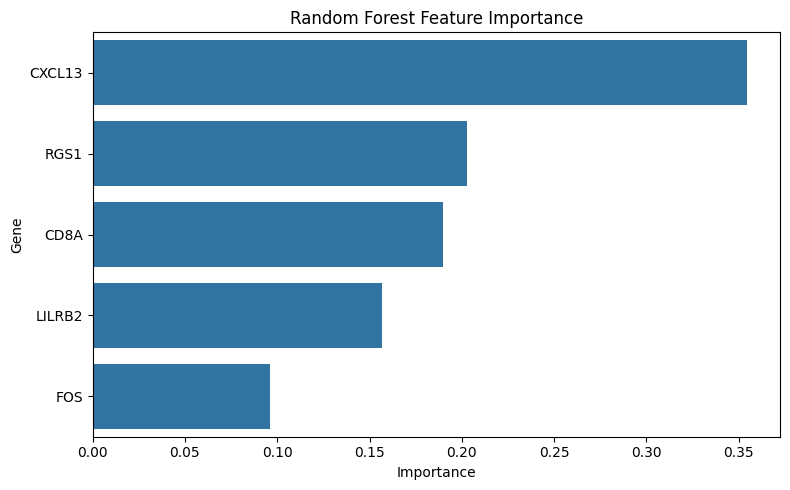


AUC - Logistic: 0.889
AUC - Random Forest: 0.923


In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.902


50058's interval hub gene

In [41]:
hub_genes = ["FAM26F.1", "GPR171", "229668_at", "B2M.2", "FAXDC2", "CCL4", "CXCL11", "SOST"]

Logistic Regression Coefficients:
        Gene  Coefficient
5       CCL4     1.004338
2  229668_at    -0.719023
7       SOST    -0.708665
3      B2M.2     0.656440
4     FAXDC2    -0.588316
6     CXCL11     0.469280
0   FAM26F.1    -0.441934
1     GPR171     0.264069


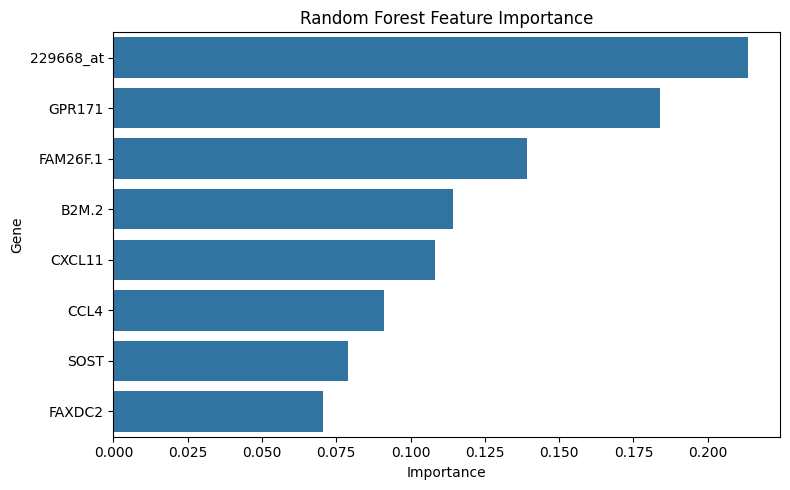


AUC - Logistic: 0.923
AUC - Random Forest: 0.929


In [ ]:
X = expression_df[hub_genes]
y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)


stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.927


50058's cyto node hub gene

In [30]:
hub_genes = ["CXCL11", "B2M", "LCP2", "CCL4",  "FCGR3B"]

Logistic Regression Coefficients:
     Gene  Coefficient
0  CXCL11     0.506663
4  FCGR3B     0.329018
3    CCL4     0.236427
2    LCP2     0.179367
1     B2M    -0.129054


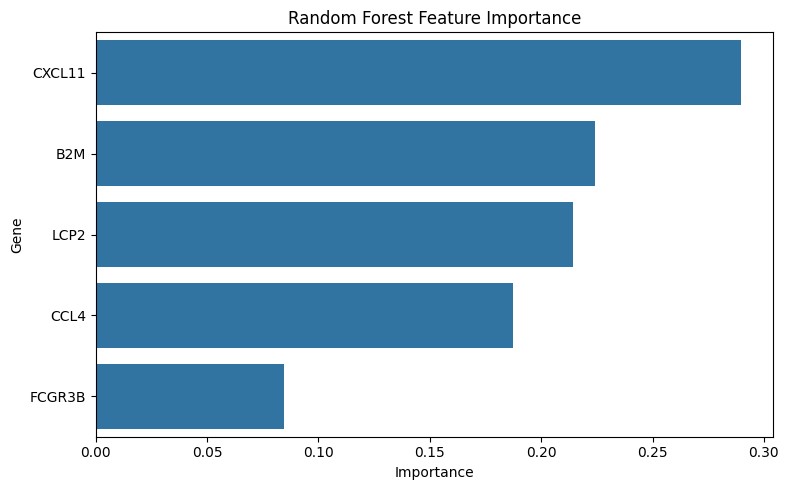


AUC - Logistic: 0.940
AUC - Random Forest: 0.936


In [ ]:
X = expression_df[hub_genes]

y = expression_df["Rejection Status"].map({"Rejection": 1, "Non Rejection": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.932
